In [17]:
from perceptron import Perceptron, df
from adaline import AdalineGD
from utils import plot_decsion_regions

In [2]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from multiprocessing.spawn import import_main_path
import matplotlib.pyplot as plt
import numpy as np




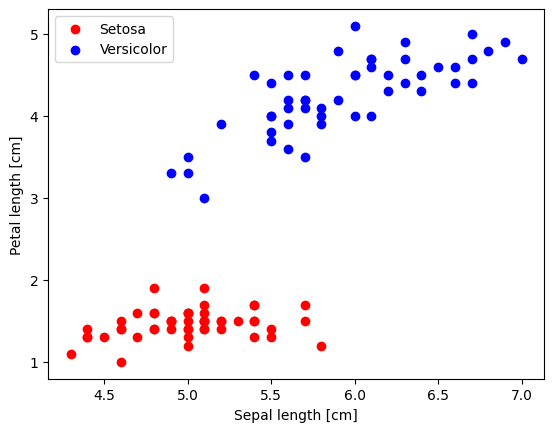

In [4]:
# select setosa and vesicolor

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(
    X[:50, 0], X[:50, 1], 
    color='red', label='Setosa')


plt.scatter(
    X[50:100, 0], X[50:100, 1], 
    color='blue', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='best')
plt.show()

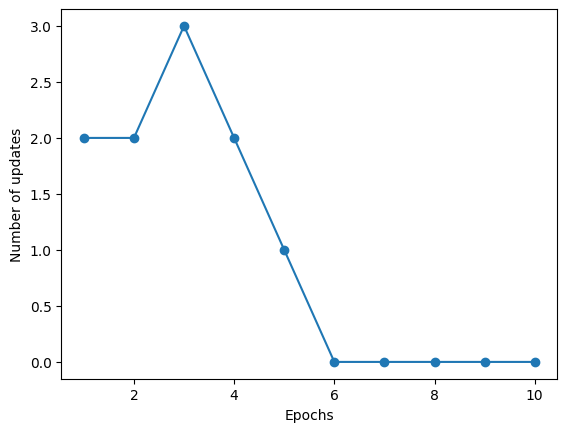

In [5]:
# from pandas import errors


ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), 
            ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


In [6]:
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [7]:
from turtle import color
from matplotlib.colors import ListedColormap

def plot_decsion_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')

    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolors='black'


        )

In [8]:
xx1, xx2 = np.meshgrid(np.arange(-1, 1, 0.02),

                            np.arange( -1, 1, 0.02 ))


np.array([xx1.ravel(), xx2.ravel()]).T

array([[-1.  , -1.  ],
       [-0.98, -1.  ],
       [-0.96, -1.  ],
       ...,
       [ 0.94,  0.98],
       [ 0.96,  0.98],
       [ 0.98,  0.98]], shape=(10000, 2))

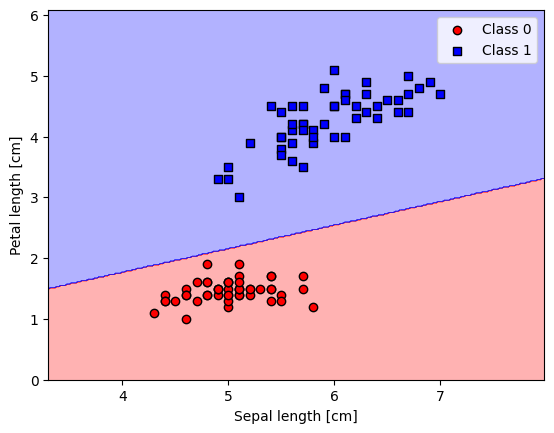

In [9]:
plot_decsion_regions(X, y, classifier=ppn)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='best')
plt.show()

In [10]:
X_std = X.copy()

X_std[:, 0] = (X[:, 0] - X[:, 0].mean())/X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean())/X[:, 1].std()

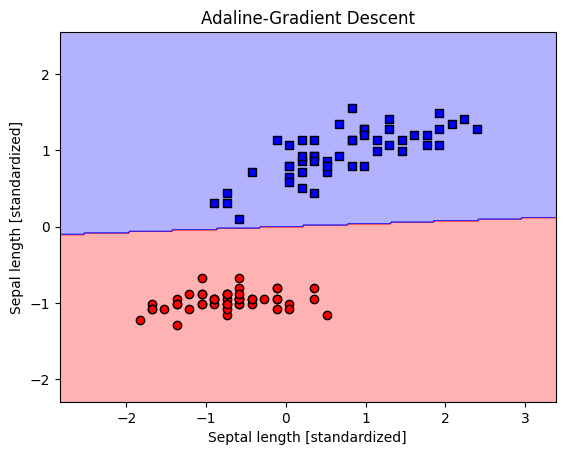

In [13]:
from matplotlib.pyplot import plot


ada_gd = AdalineGD(n_iter=20, eta=0.2)

ada_gd.fit(X_std, y)

plot_decsion_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline-Gradient Descent')
plt.xlabel('Septal length [standardized]')
plt.ylabel('Sepal length [standardized]')
plt.show()

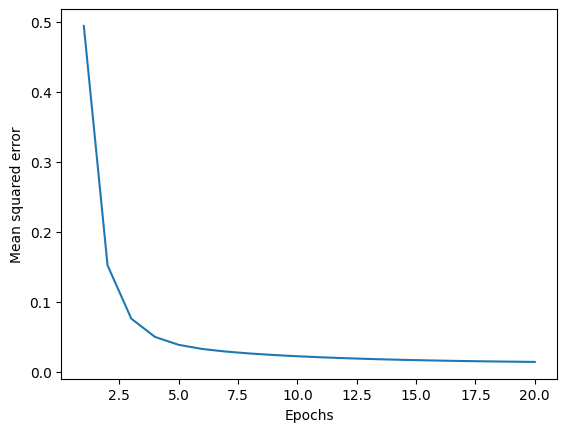

In [14]:
plt.plot(range(1, len(ada_gd.losses_) + 1),
            ada_gd.losses_)
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.show()